In [1]:
%matplotlib inline

Calculate distances to a user-defined anchor point
==================================================

This example shows how to use {func}`squidpy.tl.var_by_distance` to calculate the minimum distances of all observations
to a user-defined anchor point, store the results in {attr}`anndata.AnnData.obsm` and plot the expression by distance.
using {func}`squidpy.pl.var_by_distance`.

In [3]:
import squidpy as sq

First, let's download the MIBI-TOF dataset.

In [4]:
adata = sq.datasets.mibitof()

This data set contains a cell type annotation in {attr}`anndata.AnnData.obs["Cluster"]`
and a slide annotation in {attr}`anndata.AnnData.obs["library_id"]`

In [5]:
adata.obs

,row_num,point,cell_id,X1,center_rowcoord,center_colcoord,cell_size,category,donor,Cluster,batch,library_id
3034-0,3086,23,2,60316.0,269.0,7.0,408.0,carcinoma,21d7,Epithelial,0,point23
3035-0,3087,23,3,60317.0,294.0,6.0,408.0,carcinoma,21d7,Epithelial,0,point23
3036-0,3088,23,4,60318.0,338.0,4.0,304.0,carcinoma,21d7,Imm_other,0,point23
3037-0,3089,23,6,60320.0,372.0,6.0,219.0,carcinoma,21d7,Myeloid_CD11c,0,point23
3038-0,3090,23,8,60322.0,417.0,5.0,303.0,carcinoma,21d7,Myeloid_CD11c,0,point23
...,...,...,...,...,...,...,...,...,...,...,...,...
47342-2,48953,16,1103,2779.0,143.0,1016.0,283.0,carcinoma,90de,Fibroblast,2,point16
47343-2,48954,16,1104,2780.0,814.0,1017.0,147.0,carcinoma,90de,Fibroblast,2,point16
47344-2,48955,16,1105,2781.0,874.0,1018.0,142.0,carcinoma,90de,Imm_other,2,point16
47345-2,48956,16,1106,2782.0,257.0,1019.0,108.0,carcinoma,90de,Fibroblast,2,point16


For each slide we now want to calculate the distance of all observations to the closest Epithelial cell.
In addition we want to include the condition of the donors and the donor id in the resulting design matrix
As we don't create a copy, the result will be stored in {attr}`anndata.AnnData.obsm`.

In [6]:
sq.tl.var_by_distance(
    adata=adata,
    groups="Epithelial",
    cluster_key="Cluster",
    library_key="library_id",
    covariates=["category", "donor"],
)

Since we didn't specify a name, the resulting data frame is called "design_matrix".
NaN values indicate, that the observation belongs to an anchor point
or that the coordinates for this observation weren't available from the beginning on.

In [7]:
adata.obsm["design_matrix"]

,Cluster,library_id,Epithelial,Epithelial_raw,category,donor
3034-0,Epithelial,point23,NaN,0.000000,carcinoma,21d7
3035-0,Epithelial,point23,NaN,0.000000,carcinoma,21d7
3036-0,Imm_other,point23,0.043157,33.105891,carcinoma,21d7
3037-0,Myeloid_CD11c,point23,0.066190,50.774009,carcinoma,21d7
3038-0,Myeloid_CD11c,point23,0.109999,84.380092,carcinoma,21d7
...,...,...,...,...,...,...
47342-2,Fibroblast,point16,0.849905,651.958588,carcinoma,90de
47343-2,Fibroblast,point16,0.418362,320.923667,carcinoma,90de
47344-2,Imm_other,point16,0.439758,337.336627,carcinoma,90de
47345-2,Fibroblast,point16,0.724977,556.126784,carcinoma,90de


We now want to visualize the results and plot the expression of CD98 by distance to the closest Epithelial cell.
In addition we want to differentiate between two expression trends by specifying a covariate.

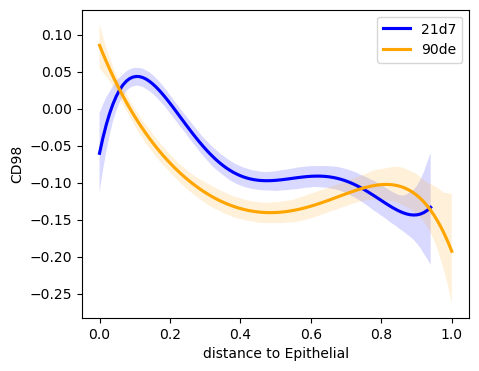

In [8]:
sq.pl.var_by_distance(
    adata=adata,
    design_matrix_key="design_matrix",
    var="CD98",
    anchor_key="Epithelial",
    covariate="donor",
    line_palette=["blue", "orange"],
    show_scatter=False,
    figsize=(5, 4),
)